In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from src.config import DATA_DIRECTORY
from src import utils

def get_last_ended_action(group):
    """Return the enforcement action with the most recent VIOL_END_DATE"""
    return group.sort_values(by='VIOL_END_DATE', na_position='first', ascending=False).iloc[0]


pd.set_option("display.max_columns", 999)

# Load the table of compliance violations

In [3]:
df = pd.read_csv(DATA_DIRECTORY / 'interim' / 'hr2w_exceedance.csv')

### A sample of violations

In [4]:
df.sample(10)

,REGULATING_AGENCY,WATER_SYSTEM_NUMBER,WATER_SYSTEM_NAME,CLASSIFICATION,POPULATION,SERVICE_CONNECTIONS,COUNTY,CITY,ZIPCODE,VIOLATION_NUMBER,VIOLATION_TYPE_NAME,ANALYTE_NAME,RESULT,MCL,VIOL_BEGIN_DATE,VIOL_END_DATE,ENF_ACTION_NUMBER,ENF_ACTION_ISSUE_DATE,ENF_ACTION_TYPE_ISSUED
3577,DISTRICT 13 - SAN BERNARDINO,CA2610003,BRIDGEPORT PUD,COMMUNITY,2150,293,MONO,BRIDGEPORT,93517,9913029,"MCL, AVERAGE",ARSENIC,0.0245 MG/L,,2018-04-01,2018-06-30,9913012,2015-03-06,FORMAL ENFORCEMENT ACTION ISSUED
1951,DISTRICT 12 - VISALIA,CA1500585,OASIS PROPERTY OWNERS ASSOCIATION,COMMUNITY,100,39,KERN,BAKERSFIELD,93307,9512008,"MCL, AVERAGE",ARSENIC,0.011 MG/L,0.010 MG/L,2014-01-01,2014-03-31,919013,2009-01-23,FORMAL ENFORCEMENT ACTION ISSUED
1551,DISTRICT 19 - TEHACHAPI,CA1500442,SUNSET APARTMENTS WS,COMMUNITY,37,20,KERN,NORTH EDWARDS,93523,9612010,"MCL, AVERAGE",ARSENIC,0.039 MG/L,0.010 MG/L,2013-07-01,2013-09-30,919015,2009-01-28,FORMAL ENFORCEMENT ACTION ISSUED
5416,DISTRICT 18 - SONOMA,CA4900640,SONOMA COUNTY MUTUAL WATER COMPANY,COMMUNITY,40,18,SONOMA,CAZADERO,95421,9803005,FAILURE TO FILTER (SWTR),SWTR,,,2013-02-01,NaN,1218005,2012-02-03,FORMAL ENFORCEMENT ACTION ISSUED
2908,DISTRICT 11 - MERCED,CA2000544,MADERA CO MD1-HIDDEN LAKE ESTATES,COMMUNITY,162,49,MADERA,FRIANT,93626,1000037,"MCL, AVERAGE",TOTAL HALOACETIC ACIDS (HAA5),0.101 UG/L,0.060 UG/L,2018-07-01,2018-09-30,1,2014-12-01,FORMAL ENFORCEMENT ACTION ISSUED
875,DISTRICT 23 - FRESNO,CA1009039,PAPPAS & CO (MENDOTA),COMMUNITY,25,12,FRESNO,FRESNO,93711,1223032,"MCL, AVERAGE",TTHM,0.175 MG/L,0.080 MG/L,2013-07-01,2013-09-30,1223013,2014-11-07,STATE INTENTIONAL NO ACTION TAKEN
2287,DISTRICT 12 - VISALIA,CA1510012,LAMONT PUBLIC UTILITY DIST,COMMUNITY,19057,3300,KERN,LAMONT,93241,1212035,"MCL, AVERAGE",ARSENIC,.01050000 MG/L,0.010 MG/L,2012-01-01,2012-03-31,912012,2008-12-18,FORMAL ENFORCEMENT ACTION ISSUED
2067,DISTRICT 19 - TEHACHAPI,CA1502231,ROSAMOND SCHOOL WATER SYSTEM,NON-TRANSIENT NON-COMMUNITY,940,2,KERN,ROSAMOND,93560,9812010,"MCL, AVERAGE",ARSENIC,0.011 MG/L,0.010 MG/L,2015-07-01,2015-09-30,919016,2009-01-23,FORMAL ENFORCEMENT ACTION ISSUED
6195,DISTRICT 24 - TULARE,CA5410006,"LINDSAY, CITY OF",COMMUNITY,14200,3021,TULARE,LINDSAY,93247,9112002,"MCL, AVERAGE","1,2-DIBROMO-3-CHLOROPROPANE",0.00041 MG/L,0.0002 MG/L,2012-10-01,2012-12-31,1212014,2012-03-16,FORMAL ENFORCEMENT ACTION ISSUED
5581,LPA80 - STANISLAUS COUNTY,CA5000085,GREEN RUN MOBILE ESTATES,COMMUNITY,100,46,STANISLAUS,TURLOCK,95380,1480002,"MCL, AVERAGE",ARSENIC,0.015 MG/L,0.010 MG/L,2014-01-31,2014-03-31,1180001,2010-03-19,FORMAL ENFORCEMENT ACTION ISSUED


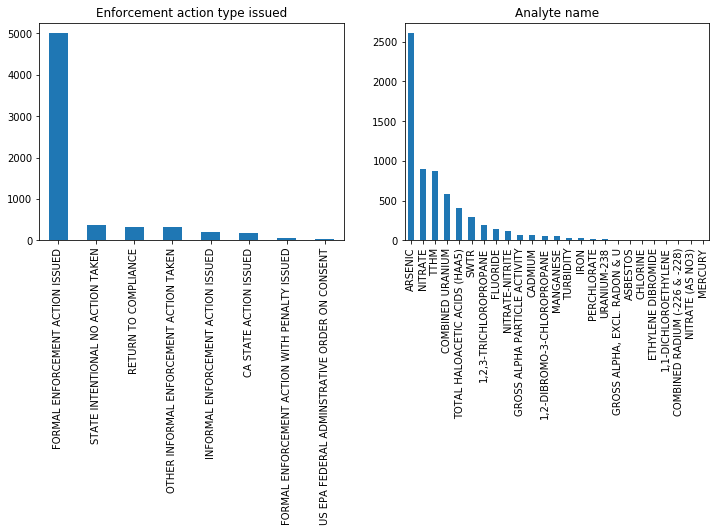

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
df.ENF_ACTION_TYPE_ISSUED.value_counts().plot.bar(title='Enforcement action type issued', ax=axs[0]);
df.ANALYTE_NAME.value_counts().plot.bar(title='Analyte name', ax=axs[1]);

In [6]:
df.ENF_ACTION_TYPE_ISSUED.value_counts()

FORMAL ENFORCEMENT ACTION ISSUED                 5009
STATE INTENTIONAL NO ACTION TAKEN                 356
RETURN TO COMPLIANCE                              329
OTHER INFORMAL ENFORCEMENT ACTION TAKEN           311
INFORMAL ENFORCEMENT ACTION ISSUED                204
CA STATE ACTION ISSUED                            169
FORMAL ENFORCEMENT ACTION WITH PENALTY ISSUED      62
US EPA FEDERAL ADMINSTRATIVE ORDER ON CONSENT      27
Name: ENF_ACTION_TYPE_ISSUED, dtype: int64

In [27]:
groups = df.groupby(['WATER_SYSTEM_NUMBER', 'ANALYTE_NAME'])

last_ended_action = groups.apply(get_last_ended_action)

Do not include water system/analyte combinations that ended with a return to compliance

In [28]:
active_violations = last_ended_action[last_ended_action.ENF_ACTION_TYPE_ISSUED != 'RETURN TO COMPLIANCE']
active_violations.reset_index(drop=True, inplace=True)

# There are 330 water systems with at least one analyte out of compliance

In [29]:
print(f"{active_violations.WATER_SYSTEM_NUMBER.unique().size} water systems with at least one analyte out of compliance")

330 water systems with at least one analyte out of compliance


We also compute a histogram of number of water systems with different numbers of analytes out of compliance.

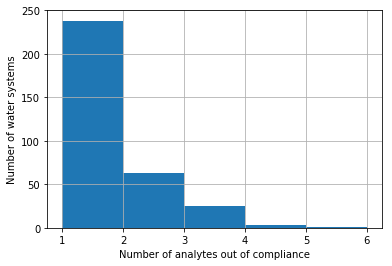

In [30]:
fig, ax = plt.subplots();
counts = active_violations.groupby('WATER_SYSTEM_NUMBER').apply(lambda x: len(x)).sort_values(ascending=False)
counts.hist(bins=np.arange(1, max(counts) + 1, 1));
ax.set_xlabel('Number of analytes out of compliance');
ax.set_ylabel('Number of water systems');

In [41]:
population_affected = active_violations.drop_duplicates(subset=['WATER_SYSTEM_NUMBER']).POPULATION.sum()
print(f"{utils.millify(population_affected)} people affected")

1 million people affected
